In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import matplotlib.image as mpimg
from datetime import datetime

In [ ]:
from collections import namedtuple, deque
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Dataset_path_pastora = "/content/drive/MyDrive/Reinforcement_learning/Demanda_Pastora.xlsx"
Dataset_path_miraflores = "/content/drive/MyDrive/Reinforcement_learning/Demanda_miraflores.xlsx"

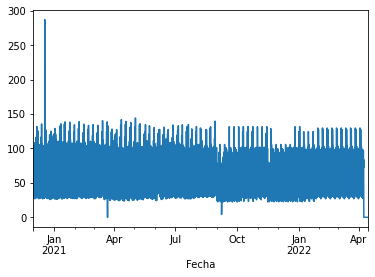

In [ ]:
data_demanda_pastora=pd.read_excel(Dataset_path_pastora)
data_demanda_pastora.index=data_demanda_pastora['Fecha']
data_demanda_pastora = data_demanda_pastora[~data_demanda_pastora.index.duplicated(keep='first')]
data_demanda_pastora=data_demanda_pastora.sort_index()
data_demanda_pastora=data_demanda_pastora.asfreq('1H', method='ffill')
data_demanda_pastora.head()
data_demanda_pastora['Valor'].plot()

In [ ]:
data_demanda_pastora['Valor'][data_demanda_pastora['Valor']<24.58] = data_demanda_pastora['Valor'].quantile(0.02)
data_demanda_pastora['Valor'][data_demanda_pastora['Valor']>124.52] = data_demanda_pastora['Valor'].quantile(0.98)

<ipython-input-6-f7b348d36041>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_demanda_pastora['Valor'][data_demanda_pastora['Valor']<24.58] = data_demanda_pastora['Valor'].quantile(0.02)
<ipython-input-6-f7b348d36041>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_demanda_pastora['Valor'][data_demanda_pastora['Valor']>124.52] = data_demanda_pastora['Valor'].quantile(0.98)


In [ ]:
data_demanda_pastora['hora'] = pd.DatetimeIndex(data_demanda_pastora['Fecha']).hour

In [ ]:
data_demanda_pastora.head(25)

,Fecha,Valor,hora
Fecha,,,
2020-12-01 00:00:00,2020-12-01 00:00:00,42.710598,0
2020-12-01 01:00:00,2020-12-01 01:00:00,33.223904,1
2020-12-01 02:00:00,2020-12-01 02:00:00,29.838856,2
2020-12-01 03:00:00,2020-12-01 03:00:00,29.837402,3
2020-12-01 04:00:00,2020-12-01 04:00:00,38.123222,4
2020-12-01 05:00:00,2020-12-01 05:00:00,52.160778,5
2020-12-01 06:00:00,2020-12-01 06:00:00,71.938728,6
2020-12-01 07:00:00,2020-12-01 07:00:00,82.213676,7
2020-12-01 08:00:00,2020-12-01 08:00:00,82.623955,8


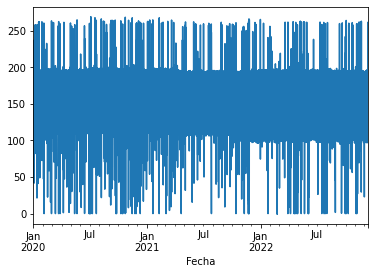

In [ ]:
data_demanda_miraflores=pd.read_excel(Dataset_path_miraflores)
data_demanda_miraflores.index=data_demanda_miraflores['Fecha']
data_demanda_miraflores = data_demanda_miraflores[~data_demanda_miraflores.index.duplicated(keep='first')]
data_demanda_miraflores=data_demanda_miraflores.sort_index()
data_demanda_miraflores=data_demanda_miraflores.asfreq('1H', method='ffill')
data_demanda_miraflores.head()
data_demanda_miraflores['Valor'].plot()

In [ ]:
data_demanda_miraflores.describe()

,ID,Valor
count,25833.0,25833.000000
mean,58.0,153.459315
std,0.0,45.094048
min,58.0,-0.999000
25%,58.0,110.973373
50%,58.0,168.814484
75%,58.0,193.085052
max,58.0,269.264404


In [ ]:
data_demanda_miraflores.quantile(0.02)

ID       58.000000
Valor    86.445602
Name: 0.02, dtype: float64

In [ ]:
data_demanda_miraflores.quantile(0.98)

ID        58.000000
Valor    214.761664
Name: 0.98, dtype: float64

In [ ]:
data_demanda_miraflores['Valor'][data_demanda_miraflores['Valor']<86.44] = data_demanda_miraflores['Valor'].quantile(0.02)
data_demanda_miraflores['Valor'][data_demanda_miraflores['Valor']>214.76] = data_demanda_miraflores['Valor'].quantile(0.98)

<ipython-input-13-4017849bafea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_demanda_miraflores['Valor'][data_demanda_miraflores['Valor']<86.44] = data_demanda_miraflores['Valor'].quantile(0.02)
<ipython-input-13-4017849bafea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_demanda_miraflores['Valor'][data_demanda_miraflores['Valor']>214.76] = data_demanda_miraflores['Valor'].quantile(0.98)


In [ ]:
data_demanda_miraflores['hora'] = pd.DatetimeIndex(data_demanda_miraflores['Fecha']).hour

In [ ]:
data_demanda_miraflores.head(25)

,ID,Fecha,Valor,hora
Fecha,,,,
2020-01-01 00:00:00,58,2020-01-01 00:00:00,111.095078,0
2020-01-01 01:00:00,58,2020-01-01 01:00:00,111.308624,1
2020-01-01 02:00:00,58,2020-01-01 02:00:00,111.596725,2
2020-01-01 03:00:00,58,2020-01-01 03:00:00,111.972168,3
2020-01-01 04:00:00,58,2020-01-01 04:00:00,112.333496,4
2020-01-01 05:00:00,58,2020-01-01 05:00:00,112.748184,5
2020-01-01 06:00:00,58,2020-01-01 06:00:00,112.863586,6
2020-01-01 07:00:00,58,2020-01-01 07:00:00,112.627472,7
2020-01-01 08:00:00,58,2020-01-01 08:00:00,112.330856,8


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class ReplayBuffer:
  def __init__(self, action_size, buffer_size, batch_size, seed): 
    self.action_size = action_size
    self.memory = deque(maxlen=buffer_size)
    self.batch_size = batch_size
    self.experiences = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
    self.seed = random.seed(seed)
        
  def add(self,state, action, reward, next_state,done):
    e = self.experiences(state,action,reward,next_state,done)
    self.memory.append(e)

  def sample(self):
    experiences = random.sample(self.memory,k=self.batch_size)
    states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
    actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
    rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
    next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
    dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
    return (states,actions,rewards,next_states,dones)

  def __len__(self):
    return len(self.memory)

In [ ]:
class QNetwork(nn.Module):
    def __init__(self, state_size,action_size, seed, fc1_unit=64,fc2_unit=64,fc3_unit=32,fc4_unit=32):
        super(QNetwork,self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1= nn.Linear(state_size,fc1_unit)
        self.fc2 = nn.Linear(fc1_unit,fc2_unit)
        self.fc3 = nn.Linear(fc2_unit,fc3_unit)
        self.fc4 = nn.Linear(fc3_unit,fc4_unit)
        self.fc5 = nn.Linear(fc4_unit,action_size)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        return self.fc5(x)

In [ ]:
class bombeo():
  def __init__(self):
    self.Nmin_pastora = 1033
    self.Nmax_pastora = 2688
    self.Nmin_miraflores = 1000
    self.Nmax_miraflores = 2400

    self.Qa_pastora = {0:0,1:61,2:112,3:142}
    self.Qa_miraflores = {0:0,1:58,2:105,3:138}

    self.number_pumps = {0:[0,0],1:[1,0],2:[2,0],3:[3,0],4:[1,1],5:[2,1],6:[3,1],7:[1,2],8:[2,2],
                    9:[3,2],10:[1,3],11:[2,3],12:[3,3],13:[0,1],14:[0,2],15:[0,3]}

    self.reset()

    self.CostoEnergia = {0:429,1:424,2:424,3:424,4:424,5:429,6:429,7:429,8:429,
                         9:429,10:433,11:433,12:433,13:429,14:429,15:429,16:429,
                         17:429,18:429,19:433,20:433,21:433,22:429,23:429}

    self.Eficiencia_pastora = {0:0,1:0.551,2:0.574,3:0.599}
    self.Eficiencia_miraflores = {0:0,1:0.489,2:0.545,3:0.586}

  def demanda_hora_pastora(self,hora):
    values_pastora,indices_pastora=np.histogram(data_demanda_pastora['Valor'][data_demanda_pastora['hora']==hora],bins=1000)
    values_pastora=values_pastora.astype(np.float32)
    weights=values_pastora/np.sum(values_pastora)
    self.value_hour_pastora=np.random.choice(indices_pastora[1:],1,p=weights)[0]
    return self.value_hour_pastora

  def demanda_hora_miraflores(self,hora):
    values_miraflores,indices_miraflores=np.histogram(data_demanda_miraflores['Valor'][data_demanda_miraflores['hora']==hora],bins=1000)
    values_miraflores=values_miraflores.astype(np.float32)
    weights=values_miraflores/np.sum(values_miraflores)
    self.value_hour_miraflores=np.random.choice(indices_miraflores[1:],1,p=weights)[0]
    return self.value_hour_miraflores

  def reset(self):
    N_pastora = random.uniform(1233,2388)
    N_miraflores = random.uniform(1200,2200)
    H = 0
    D_pastora = self.demanda_hora_pastora(H)
    D_miraflores = self.demanda_hora_miraflores(H)
    self.s=np.array([N_pastora,N_miraflores,D_pastora,D_miraflores,H])
    return np.array([N_pastora,N_miraflores,D_pastora,D_miraflores,H])
  
  def step(self, acc):
    done = False
    N_pastora,N_miraflores,D_pastora,D_miraflores,H=self.s
    Nh = H+1
    if Nh==24:
      Nh=0
    Dn_pastora = self.demanda_hora_pastora(Nh)
    Dn_miraflores = self.demanda_hora_miraflores(Nh)             

    Nn_pastora = N_pastora + self.Qa_pastora[self.number_pumps[acc][1]] - D_pastora
    Nn_miraflores = N_miraflores + self.Qa_miraflores[self.number_pumps[acc][0]] - D_miraflores - self.Qa_pastora[self.number_pumps[acc][1]]

    if Nn_pastora <0:
      Nn_pastora =0
    if Nn_miraflores <0:
      Nn_miraflores =0
      #done = True
    if Nn_pastora>3000:
      Nn_pastora =3000
    if Nn_miraflores>2850:
      Nn_miraflores =2850
      #done = True
    Bn = acc
    
    reward_miraflores = (self.Qa_miraflores[self.number_pumps[acc][0]]*3.2*self.Eficiencia_miraflores[self.number_pumps[acc][0]])*(self.CostoEnergia[H])
    reward_pastora = (self.Qa_pastora[self.number_pumps[acc][1]]*3.6*self.Eficiencia_pastora[self.number_pumps[acc][1]])*(self.CostoEnergia[H])
    reward = -(reward_miraflores + reward_pastora)

    if (Nn_pastora >= self.Nmax_pastora):
      reward += -800000
    if (Nn_miraflores >= self.Nmax_miraflores):
      reward += -800000
    if (Nn_pastora <= self.Nmin_pastora):
      reward += -800000
    if (Nn_miraflores <= self.Nmin_miraflores):
      reward += -800000

    self.s=np.array([Nn_pastora,Nn_miraflores,Dn_pastora,Dn_miraflores,Nh])
    return self.s, reward, done, {}

env = bombeo() 
env.reset()

array([1569.84015295, 2118.28841048,   28.30634655,  194.74435824,
          0.        ])

In [ ]:
env2 = bombeo() 

In [ ]:
env.step(1)

(array([1.63463678e+03, 1.27151683e+03, 3.22429531e+01, 1.40466664e+02,
        1.00000000e+00]), -38481.5616, False, {})

In [ ]:
#Construcción del agente que soluciona el modelo
BUFFER_SIZE = int(1e5)  #replay buffer size
BATCH_SIZE = 32         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-4             # for soft update of target parameters
LR = 1e-3               # learning rate
UPDATE_EVERY = 8       # how often to update the network. Not done on every movement. 
PATH = 'model.pth'

class Agent():
  def __init__(self, state_size, action_size, seed):
    self.state_size = state_size
    self.action_size = action_size
    self.seed = random.seed(seed)
    self.qnetwork_local = QNetwork(state_size, action_size, seed).to(device) #Red para entrenar localmente
    self.qnetwork_target = QNetwork(state_size, action_size, seed).to(device) #Red de referencia
    self.optimizer = optim.Adam(self.qnetwork_local.parameters(),lr=LR)
    self.memory = ReplayBuffer(action_size, BUFFER_SIZE,BATCH_SIZE,seed)
    self.t_step = 0
        
  #El método step no calcula lo que pasa en el movimiento, sino que administra la información del movimiento.
  def step(self, state, action, reward, next_step, done):
    self.memory.add(state, action, reward, next_step, done) #Adiciona a la memoria los datos obtenidos en el paso de movimiento. 
    self.t_step = (self.t_step+1)% UPDATE_EVERY             #Calcula cada cierto tiempo que se debe recalcular los pesos de la red neuronal. 
    if self.t_step == 0:
      if len(self.memory)>BATCH_SIZE:
        experience = self.memory.sample() #Se extren algunas muestras de la experiencia previa. Pero aleatorias. 
        self.learn(experience, GAMMA)     #Se le indica a la red que debe aprender. Esto es, actualizar los parámetros de acuerdo con un gradiente descendente. 

  #Método para encontrar la acción a realizar. Se busca dentro del red neuronal local, cuál es el valor de Q(s,a) estimado. Pero dependiendo de un epsilon, se define la acción óptima o la aleatoria
  def act(self, state, eps = 0): 
    state = torch.from_numpy(state).float().unsqueeze(0).to(device)
    self.qnetwork_local.eval() #La red no va a entrenar, sino a evaluar. 
    with torch.no_grad():
      action_values = self.qnetwork_local(state)
    self.qnetwork_local.train() #La red dejó de evaluar. Ahora puede ser entrenada de nuevo. 
    
    if random.random() > eps:
      return np.argmax(action_values.cpu().data.numpy())
    else:
      return random.choice(np.arange(self.action_size))
            
  #En este método se le dice a la red que aprenda. La red local. Se hace una evaluación de un gradiente descendente y se calculan nuevos parámetros. Pero se hace con un batch de valores, no con uno solo. 
  def learn(self, experiences, gamma):
    states, actions, rewards, next_states, dones = experiences
    criterion = torch.nn.MSELoss() #Norma L2 para el cálculo del error. 
    self.qnetwork_local.train() #La red local se va a entrenar. 
    self.qnetwork_target.eval() #Esta red no se va a modificar, solamente a evaluar lo que produce a la salida. 
    predicted_targets = self.qnetwork_local(states).gather(1,actions) #Esto es lo que evalua la red neuronal local. Lo predicho de las acciones. 

    with torch.no_grad():
        labels_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
    #La red target se evalua en el estado siguiente, en Q(s',a). No en el estado actual y se recibe el valor máximo de acción a tomar allí. 
    # .detach() ->  Returns a new Tensor, detached from the current graph.
    labels = rewards + (gamma* labels_next*(1-dones)) #Acá se actualizan los valores predichos de los estados que son terminales y de los que no son terminales. ****
    #Se hace la función de error,
    loss = criterion(predicted_targets,labels).to(device)
    self.optimizer.zero_grad() #Reset del gradiente
    loss.backward() #Gradiente descendente
    self.optimizer.step() #Actualización de los parámetros. 
    self.save(self.qnetwork_local,PATH)

    # ------------------- update target network ------------------- #
    #Esta actualización puede hacerse cada cierto tiempo completamente copiando los parámetros de una red a otra o de manera suave, haciendo un proceso de suavización exponencial. Pero la red
    #target no puede actualizarse al mismo ritmo que la red locakl. 
    self.soft_update(self.qnetwork_local,self.qnetwork_target,TAU)

  def save(self,model,path):
    #device = torch.device("cuda")
    model.to(device)
    torch.save(model.state_dict(),path)

  #Actualización de los parámetros de la red target suavizasos a partir de la red local. El parámtro TAU determina que tanto afecta el nuevo valor al anterior. TAU cercano a 0, hace que el aprendizaje sea lento
  def soft_update(self, local_model, target_model, tau):
    for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
      target_param.data.copy_(tau*local_param.data + (1-tau)*target_param.data)


In [ ]:
#Se crea el agente
agent = Agent(state_size=5, action_size=15, seed=0)

#Método principal del programa
def dqn(n_episodes= 20000, max_t = 50, eps_start=1.0, eps_end = 0.01, eps_decay=0.96):
  plt.figure(figsize=(10,10))
  scores = [0] # lista que contiene las recompensas de cada movimiento. 
  eps = eps_start
  for i_episode in range(1, n_episodes+1):
    state = env.reset()
    score = 0
    x=[]
    for t in range(max_t):
      action = agent.act(state,eps) #Se busca la nueva acción de acuerdo con 
      next_state,reward,done,_ = env.step(action)
      agent.step(state,action,reward,next_state,done)
      state = next_state
      score += reward
      x.append(state[0])
      if(done):
        break
      eps = max(eps*eps_decay,eps_end)## decrease the epsilon
      #print('\rEpisode {}\tAverage Score {:.2f}'.format(i_episode,np.mean(scores_window)), end="")
      if(i_episode%2000==0):
        print('Episode {}\tAverage Score {:.2f}'.format(i_episode,scores[-1]), end="")
      else:
        print('\rEpisode {}\tAverage Score {:.2f}'.format(i_episode,scores[-1]), end="")

    scores.append(score) ## sae the most recent score

    if(i_episode%2000==0):
      plt.plot(x,label='Iteracion: '+str(i_episode))
      plt.ylim(0,3000)
  plt.grid()
  plt.legend()
  return scores

Episode 19999	Average Score -44918230.95Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31Episode 20000	Average Score -45318299.31

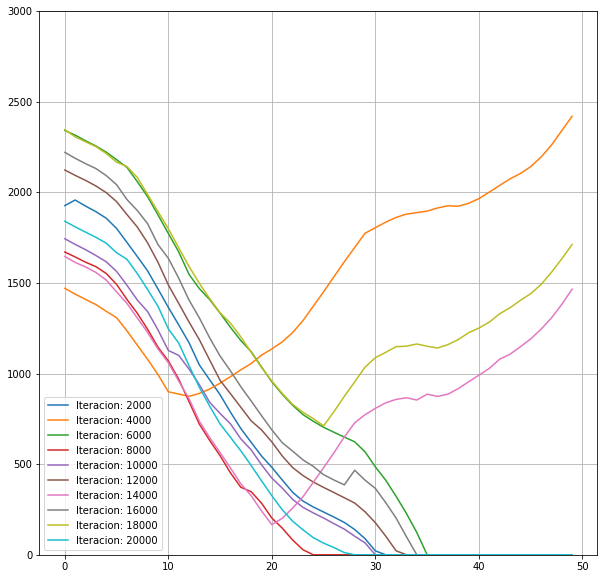

In [ ]:
import matplotlib.pyplot as plt
scores= dqn(n_episodes= 20000)

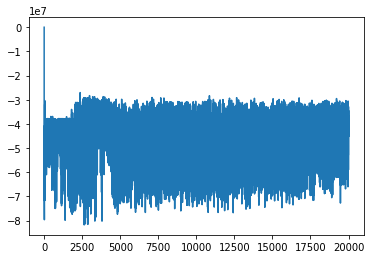

In [ ]:
plt.plot(scores)

In [ ]:
s=torch.from_numpy(np.array([2400,2300,65,10,22])).float().to(device)
out=agent.qnetwork_local(s)
with(torch.no_grad()):
  acc=np.argmax(out.cpu().numpy())
acc

1

Text(0, 0.5, 'Demanda')

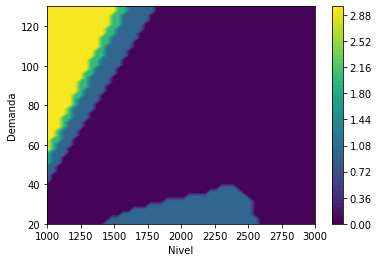

In [ ]:
from sys import version_info
from scipy.interpolate import griddata
agent.qnetwork_local.eval()
ddemanda, nnivel = np.meshgrid(np.linspace(20,130,50),np.linspace(1000,3000,50))
Pi=np.zeros_like(ddemanda)
for i in range(len(ddemanda)):
  for j in range(len(nnivel)):
    for z in range(24):
      with(torch.no_grad()):
        if z == 22:
          s=torch.from_numpy(np.array([nnivel[i,j],ddemanda[i,j],z])).float().to(device)
          out=agent.qnetwork_local(s)
          acc=np.argmax(out.cpu().numpy())
          Pi[i,j]=acc
plt.contourf(nnivel, ddemanda, Pi, 50)
plt.colorbar()
plt.xlabel('Nivel')
plt.ylabel('Demanda')

In [ ]:
loaded_model = QNetwork(state_size=3,action_size=4, seed=0, fc1_unit=64, fc2_unit=64)
loaded_model.load_state_dict(torch.load(PATH))
loaded_model.to(device)
loaded_model.eval()

QNetwork(
  (fc1): Linear(in_features=3, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=4, bias=True)
)

In [ ]:
s=torch.from_numpy(np.array([1190,55,12])).float().to(device)
loaded_model.eval()
with(torch.no_grad()):
  out=loaded_model(s)
  acc=np.argmax(out.cpu().numpy())
acc

0